In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(suppress=True)

In [2]:
from sklearn.datasets import load_boston

# 1. 데이터 불러오기

- 데이터 소개 :  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

보스턴 집 값 데이터는 Machin learning Regression Problem에 자주 사용됩니다.

- 컬럼 소개:

CRIM: 범죄율

ZN: 25,000 square feet 당 주거용 토지의 비율

INDUS: 비소매(non-retail) 비즈니스 면적 비율

CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)

NOX: 산화 질소 농도 (천만 분의 1)

RM:주거 당 평균 객실 수

AGE: 1940 년 이전에 건축된 자가 소유 점유 비율

DIS: 5 개의 보스턴 고용 센터까지의 가중 거리

RAD: 고속도로 접근성 지수

TAX: 10,000 달러 당 전체 가치 재산 세율

PTRATIO 도시 별 학생-교사 비율

B: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.

LSTAT: 인구의 낮은 지위

MEDV: 자가 주택의 중앙값 (1,000 달러 단위)

In [3]:
data = load_boston()

C:\Users\82105\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

# 2. 데이터프레임 만들기

In [7]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['MEDV'] = data['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 3. 단일 회귀 모델

## 3.1 - Trian Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], random_state=23)



<ipython-input-9-4031f516485e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], random_state=23)


In [12]:
x_train.shape, y_train.shape

((379, 13), (379,))

In [14]:
x_test.shape, y_test.shape

((127, 13), (127,))

## 3.2 평가 지표 만들기




(1) MSE (Mean Square Error)

MSE (평균 제곱 오차): 예측값과 실제값의 차이의 제곱에 대하여 평균을 낸 것

$MSE = \frac{1}{n} \sum_{i=1}^n \left( y_i - \widehat{y_i} \right)^2$




In [38]:
# sklearn 평가지표 활용
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# prediction plot
def plot_predictions(name_, actual, pred):
    df = pd.DataFrame({'actual': y_test, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# evaluation plot
def mse_eval(name_, actual, pred):
    global predictions
    global colors

    plot_predictions(name_, actual, pred)

    mse = mean_squared_error(actual, pred)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()


# coefficients visulization
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


## 3.3 Linear Regression

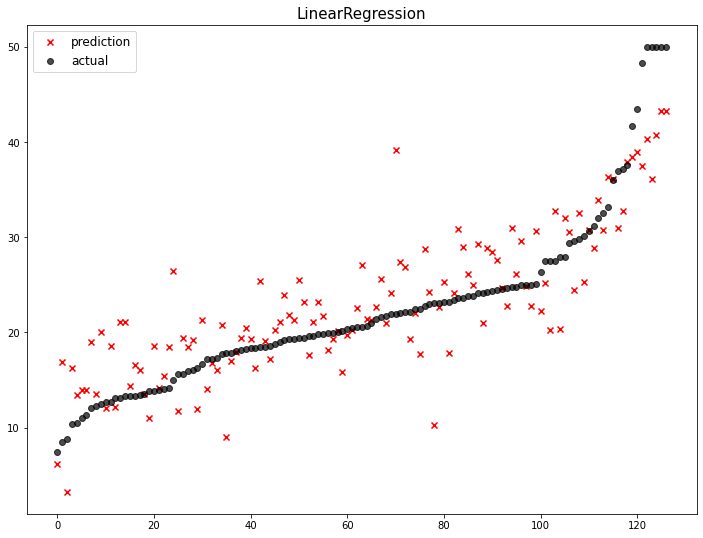

              model        mse
0  LinearRegression  22.770784


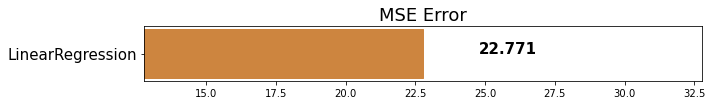

In [40]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
linear_pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', y_test, linear_pred)

## 3,4 Ridge

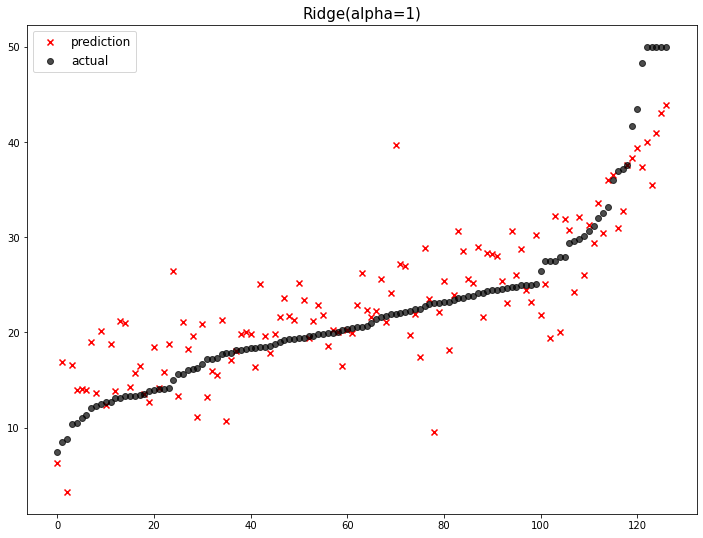

              model        mse
0  LinearRegression  22.770784
1    Ridge(alpha=1)  22.690411


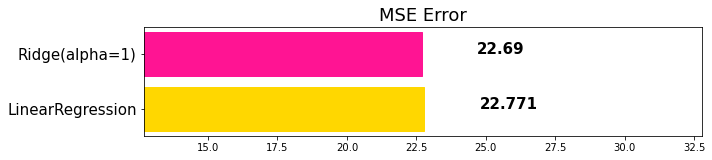

In [41]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', y_test, ridge_pred)


## 3.5 Lasso

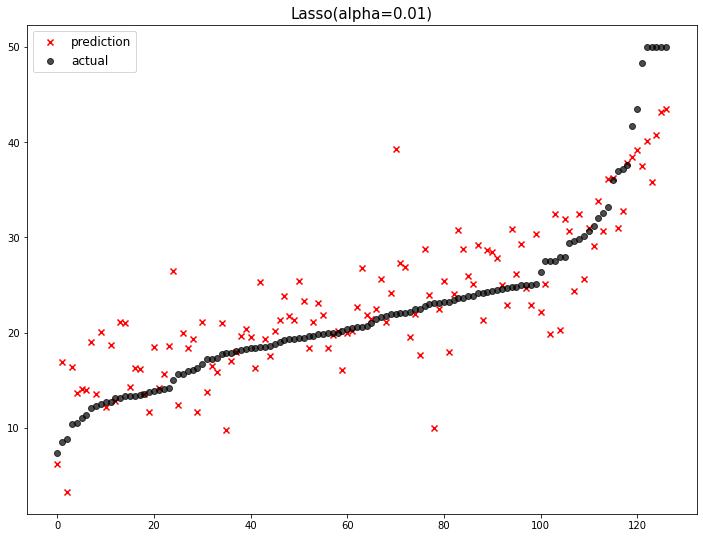

               model        mse
0   LinearRegression  22.770784
1     Ridge(alpha=1)  22.690411
2  Lasso(alpha=0.01)  22.635614


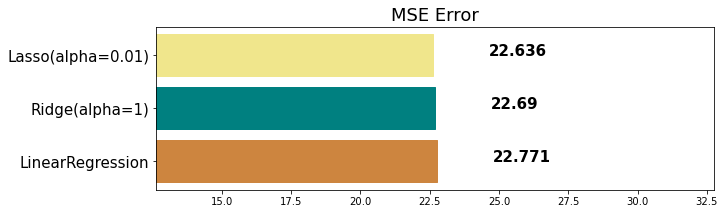

In [42]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', y_test, lasso_pred)

## 3.6 ElasticNet

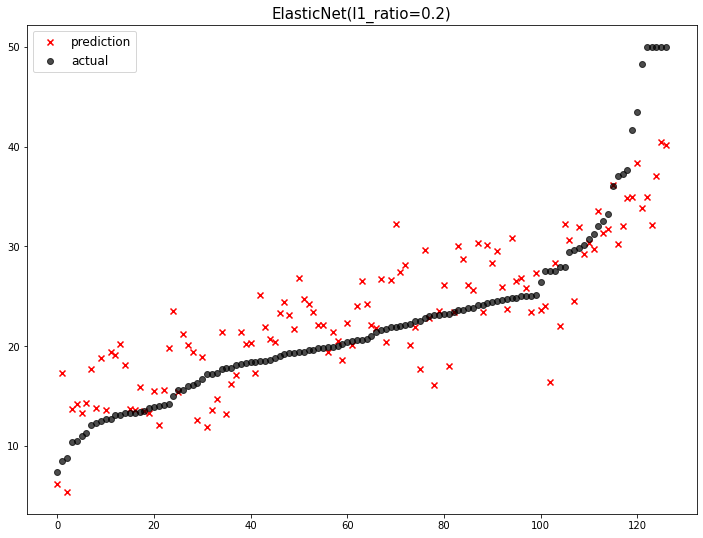

                      model        mse
0  ElasticNet(l1_ratio=0.2)  24.481069
1          LinearRegression  22.770784
2            Ridge(alpha=1)  22.690411
3         Lasso(alpha=0.01)  22.635614


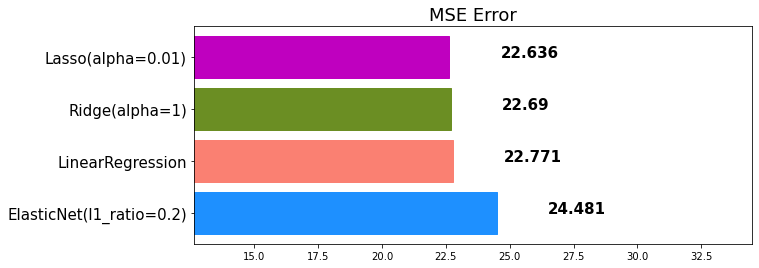

In [43]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
elasticnet.fit(x_train, y_train)
elas_pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.2)', y_test, elas_pred)

## 3.7 Standard ElasticNet

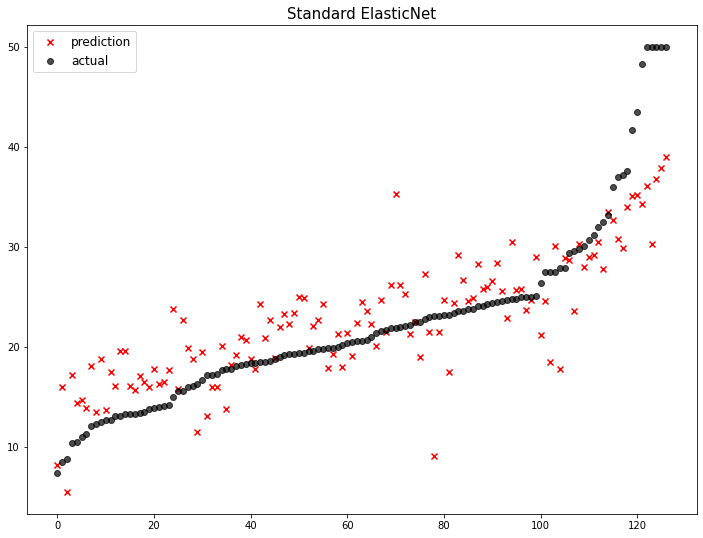

                      model        mse
0       Standard ElasticNet  26.010756
1  ElasticNet(l1_ratio=0.2)  24.481069
2          LinearRegression  22.770784
3            Ridge(alpha=1)  22.690411
4         Lasso(alpha=0.01)  22.635614


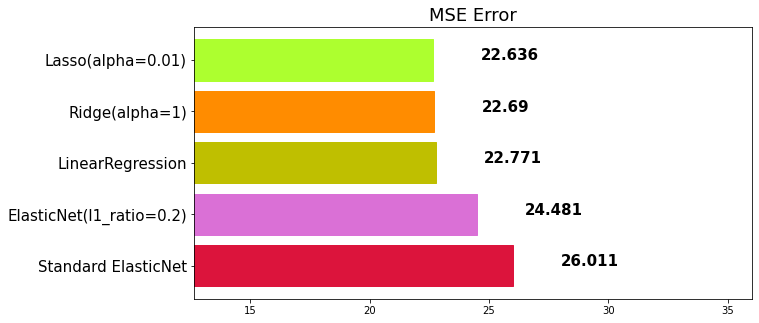

In [44]:
standard_elasticnet = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

elas_scaled_pred = standard_elasticnet.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', y_test, elas_scaled_pred)


## 3.8 Polynomial Features

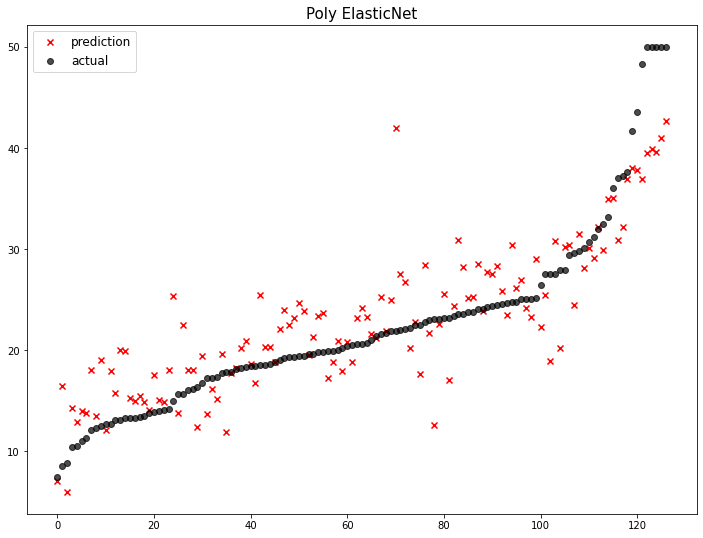

                      model        mse
0       Standard ElasticNet  26.010756
1  ElasticNet(l1_ratio=0.2)  24.481069
2          LinearRegression  22.770784
3            Ridge(alpha=1)  22.690411
4         Lasso(alpha=0.01)  22.635614
5           Poly ElasticNet  20.805986


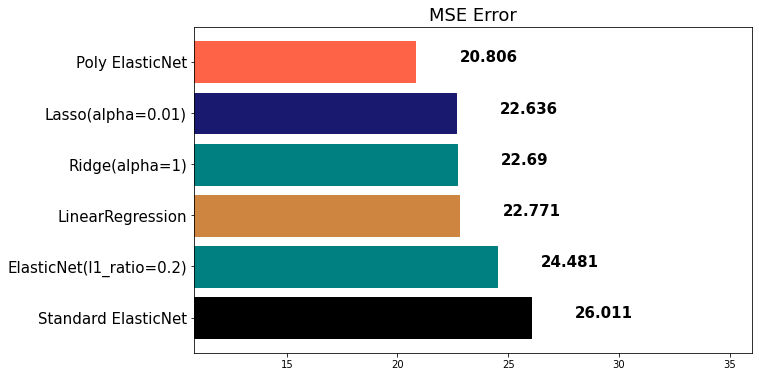

In [45]:
# 2-Degree Polynomial Features + Standard Scaling
poly_elasticnet = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

poly_pred = poly_elasticnet.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', y_test, poly_pred)

# 4. 앙상블 알고리즘

앙상블 기법의 종류

보팅 (Voting): 투표를 통해 결과 도출

배깅 (Bagging): 샘플 중복 생성을 통해 결과 도출

부스팅 (Boosting): 이전 오차를 보완하면서 가중치 부여

스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측

## 4.1 보팅(Voting)

> 회귀 Task


Voting은 단어 뜻 그대로 투표를 통해 최종 결과를 결정하는 방식이다. Voting과 Bagging은 모두 투표방식이지만, 다음과 같은 큰 차이점이 있다:

Voting은 다른 알고리즘 model을 조합해서 사용함

Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용함


In [46]:
from sklearn.ensemble import VotingRegressor

In [47]:
# 보팅에 참여한 single models 지정
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet', elasticnet),
    ('standard_elasticnet', standard_elasticnet),
    ('poly_elasticnet', poly_elasticnet)
]

In [48]:
# voting regressor 만들기
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [49]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet', ElasticNet(alpha=0.5, l1_ratio=0.2)),
                            ('standard_elasticnet',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.5,
                                                         l1_ratio=0.2))])),
                            ('poly_elasticnet',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.5,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

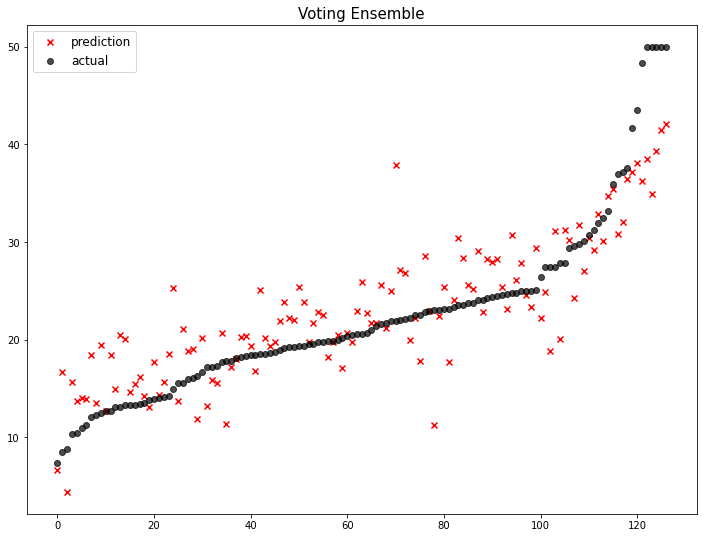

                      model        mse
0       Standard ElasticNet  26.010756
1  ElasticNet(l1_ratio=0.2)  24.481069
2          LinearRegression  22.770784
3            Ridge(alpha=1)  22.690411
4         Lasso(alpha=0.01)  22.635614
5           Voting Ensemble  22.092158
6           Poly ElasticNet  20.805986


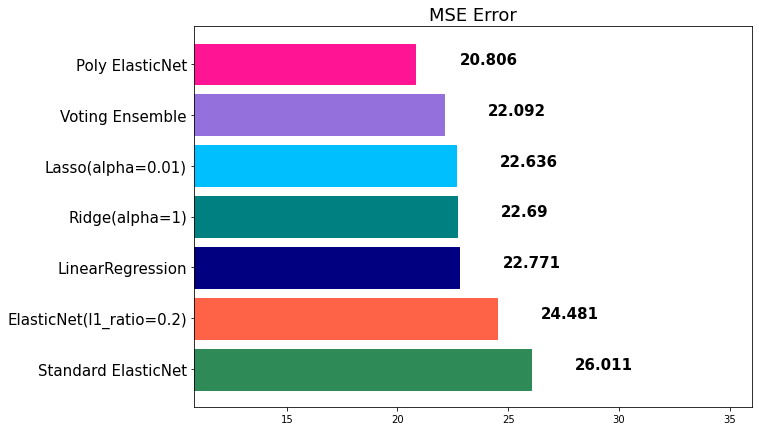

In [56]:
voting_pred = voting_regressor.predict(x_test)
mse_eval('Voting Ensemble', y_test, voting_pred)

## 4.2 배깅

배깅은 개념에 대해서만 간단히 설명하고 넘어가도록 하겠다.

Bagging은 Bootstrap Aggregating의 줄임말이다.

Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식.

데이터 셋의 구성이 [1, 2, 3, 4, 5]로 되어 있다면,

그룹 1 = [1, 2, 3]
그룹 2 = [1, 3, 4]
그룹 3 = [2, 3, 5]

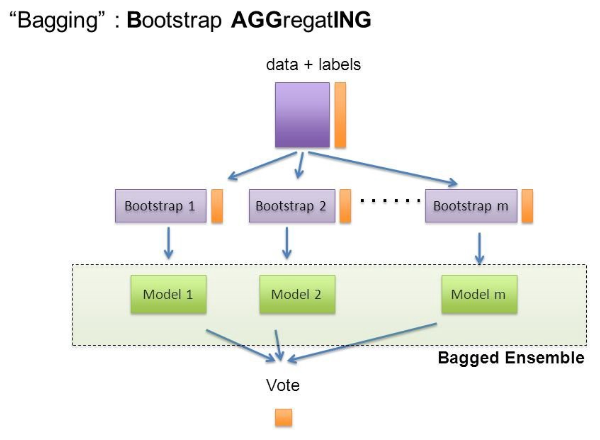

Ref: https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2

## 4.3 랜덤포레스트

의사 결정 트리 기반 배깅 앙상블

굉장히 인기있는 앙상블 모델

사용성이 쉽고, 성능도 우수함



In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

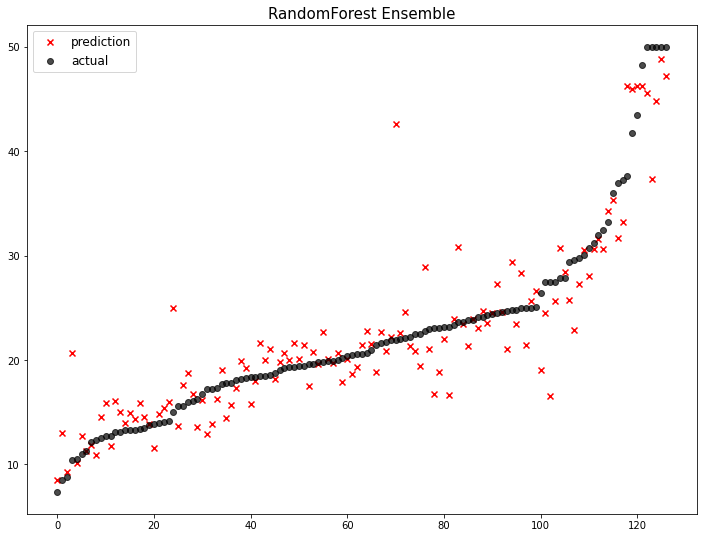

                      model        mse
0       Standard ElasticNet  26.010756
1  ElasticNet(l1_ratio=0.2)  24.481069
2          LinearRegression  22.770784
3            Ridge(alpha=1)  22.690411
4         Lasso(alpha=0.01)  22.635614
5           Voting Ensemble  22.092158
6           Poly ElasticNet  20.805986
7     RandomForest Ensemble  14.137136


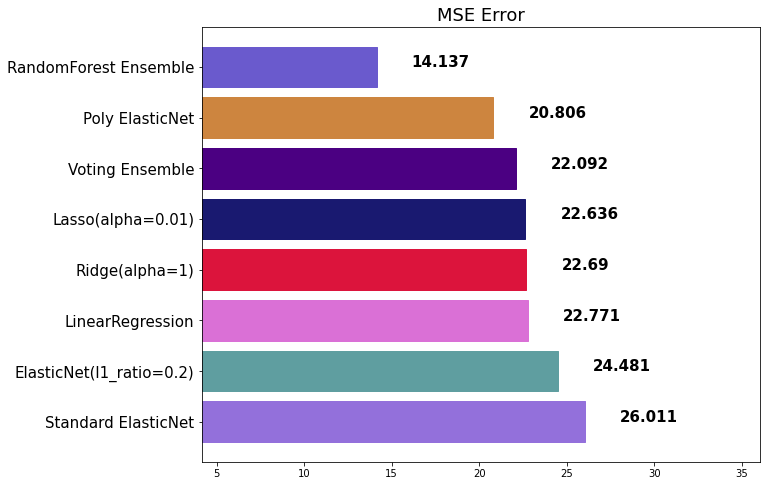

In [60]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', y_test, rfr_pred)

- 랜덤포레스트 

주요 하이퍼 매개 변수

random_state:랜덤 시드 고정 값

n_jobs: CPU 사용 갯수

max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용

n_estimators: 암상블하는 트리의 갯수

max_features:best split을 판단할 때 최대로 사용할 feature의 갯수 {'auto', 'sqrt', 'log2'}. 과대적합 방지용

min_samples_split:트리가 분할할 때 최소 샘플의 갯수. 기본값=2. 과대적합 방지용

## 4.4 하이퍼 파라미터 튜닝 랜덤포레스트

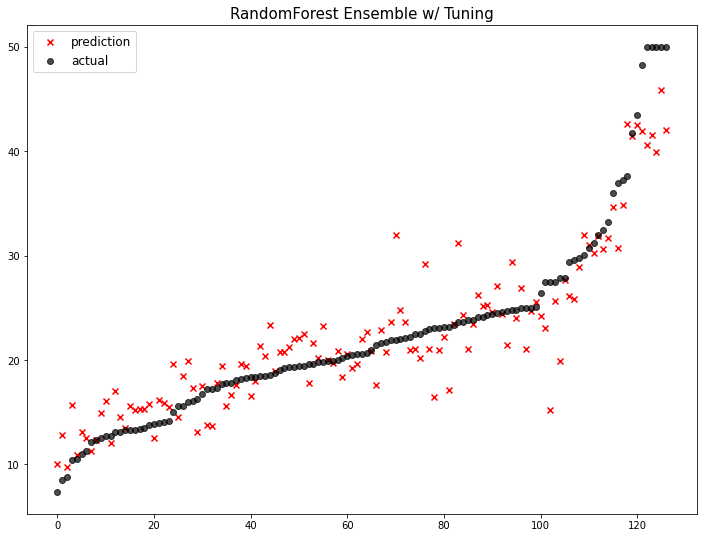

                             model        mse
0              Standard ElasticNet  26.010756
1         ElasticNet(l1_ratio=0.2)  24.481069
2                 LinearRegression  22.770784
3                   Ridge(alpha=1)  22.690411
4                Lasso(alpha=0.01)  22.635614
5                  Voting Ensemble  22.092158
6                  Poly ElasticNet  20.805986
7            RandomForest Ensemble  14.137136
8  RandomForest Ensemble w/ Tuning  11.518113


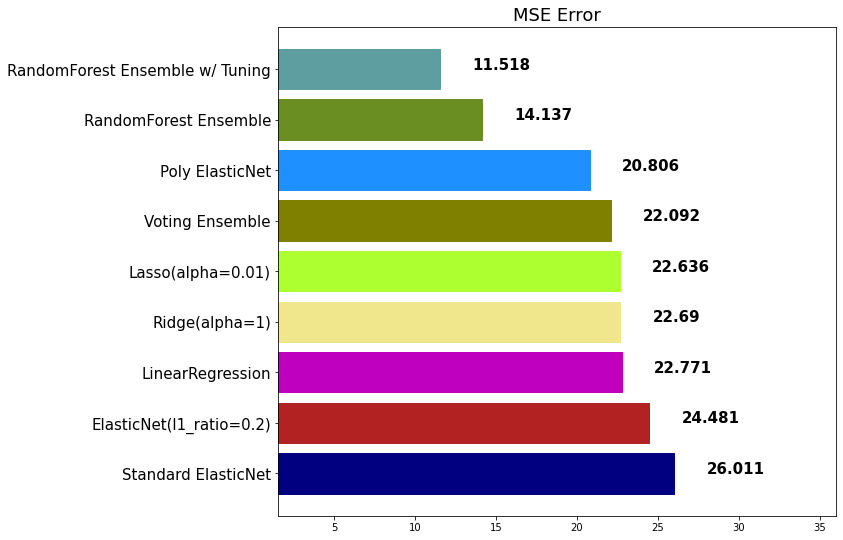

In [61]:
rfr_t = RandomForestRegressor(random_state=1, n_estimators=500, max_depth=7, max_features='sqrt')
rfr_t.fit(x_train, y_train)
rfr_t_pred = rfr_t.predict(x_test)
mse_eval('RandomForest Ensemble w/ Tuning', y_test, rfr_t_pred)

## 4.5 부스팅


악한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘멋 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식이다.


장점

성능이 매우 우수하다 (LightGBM, XGBoost)

단점

부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할 수 있다

다른 앙상블 대비 학습 시간이 오래걸린다는 단점이 존재

### 4.5.1 그라디언트 부스팅

장점: 성능이 우수함

단점: 학습 시간이 너무 오래 걸린다

In [62]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [63]:
# default value로 학습
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(x_train, y_train)


GradientBoostingRegressor(random_state=1)

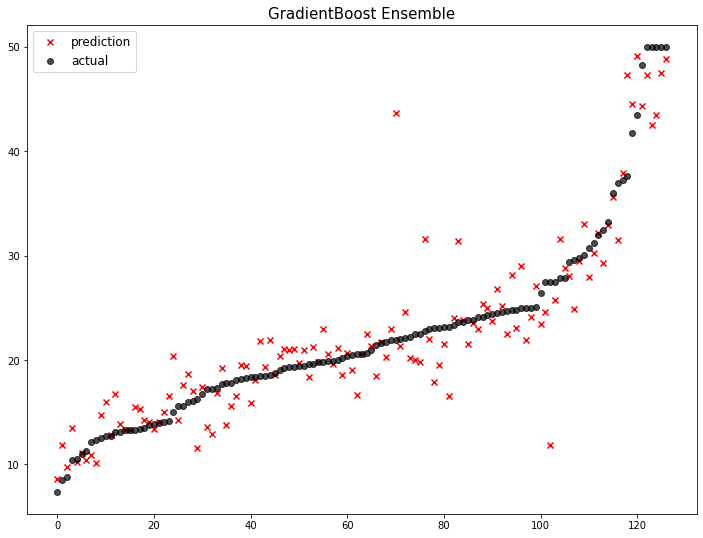

                             model        mse
0              Standard ElasticNet  26.010756
1         ElasticNet(l1_ratio=0.2)  24.481069
2                 LinearRegression  22.770784
3                   Ridge(alpha=1)  22.690411
4                Lasso(alpha=0.01)  22.635614
5                  Voting Ensemble  22.092158
6                  Poly ElasticNet  20.805986
7            RandomForest Ensemble  14.137136
8           GradientBoost Ensemble  13.451877
9  RandomForest Ensemble w/ Tuning  11.518113


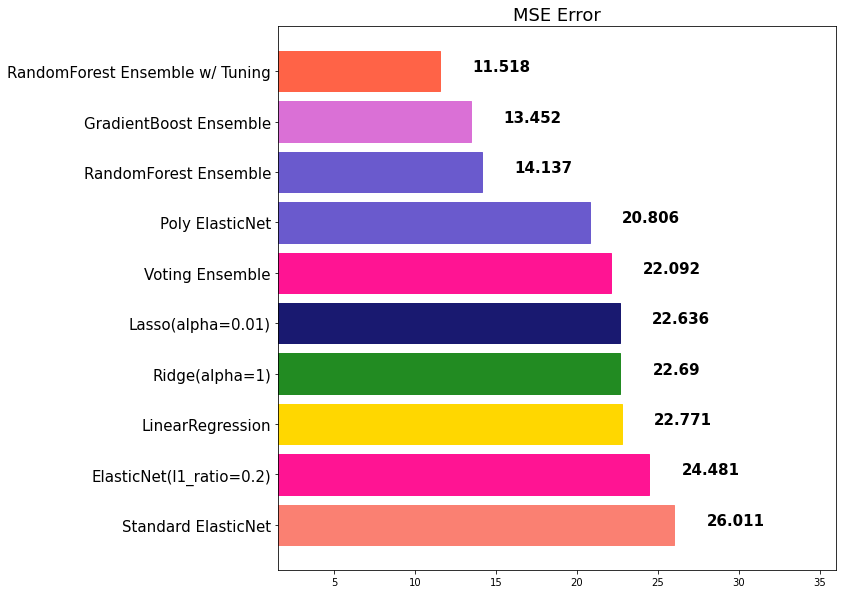

In [64]:
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', y_test, gbr_pred)

- 주요 하이퍼 파라미터 

random_state:랜덤 시드 고정 값

n_jobs: CPU 사용 갯수

학습율:학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. default=0.1 (n_estimators와 같이 튜닝해야 함)

n_estimators: 부스팅 스테이지 수. default=100
(Random Forest 트리의 갯수 설정과 비슷)

subsample: 샘플 사용 비율 (max_features와 비슷). 과대적합 방지용

min_samples_split:노드 분할시 최소 샘플의 갯수. 기본값=2. 과대적합 방지용

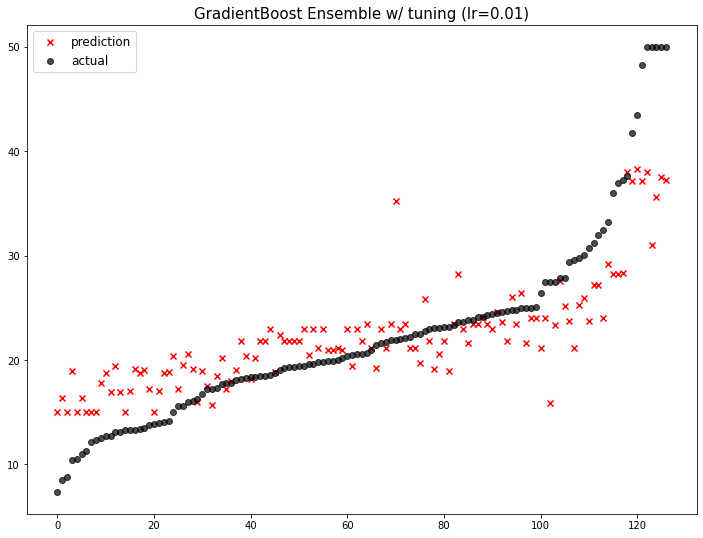

                                         model        mse
0                          Standard ElasticNet  26.010756
1   GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                     ElasticNet(l1_ratio=0.2)  24.481069
3                             LinearRegression  22.770784
4                               Ridge(alpha=1)  22.690411
5                            Lasso(alpha=0.01)  22.635614
6                              Voting Ensemble  22.092158
7                              Poly ElasticNet  20.805986
8                        RandomForest Ensemble  14.137136
9                       GradientBoost Ensemble  13.451877
10             RandomForest Ensemble w/ Tuning  11.518113


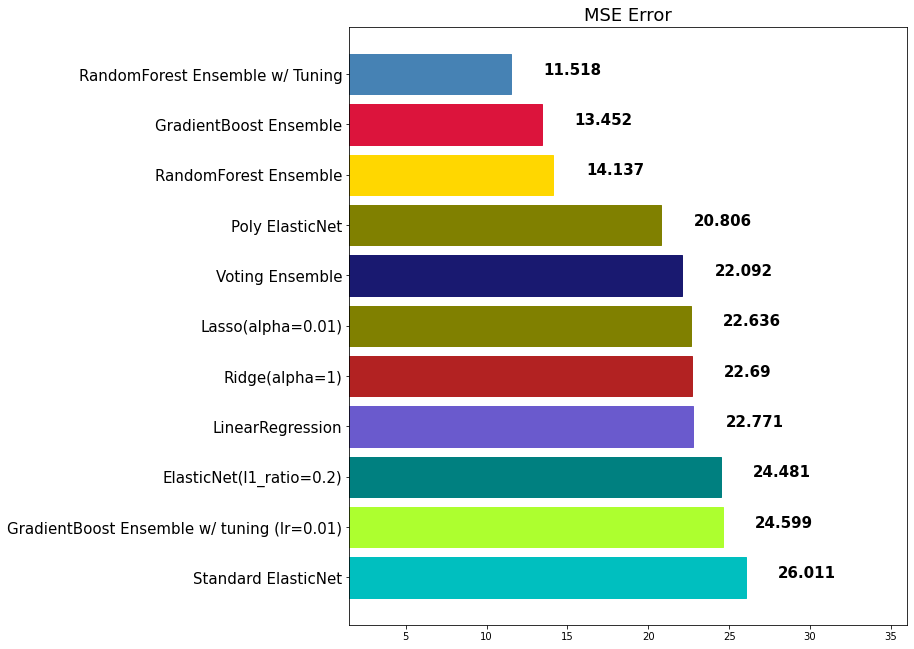

In [66]:
# with hyper-parameter tuning
# learning_rate=0.01 (without tuning n_estimators together)

gbr_t = GradientBoostingRegressor(random_state=1, learning_rate=0.01)
gbr_t.fit(x_train, y_train)
gbr_t_pred = gbr_t.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01)', y_test, gbr_t_pred)


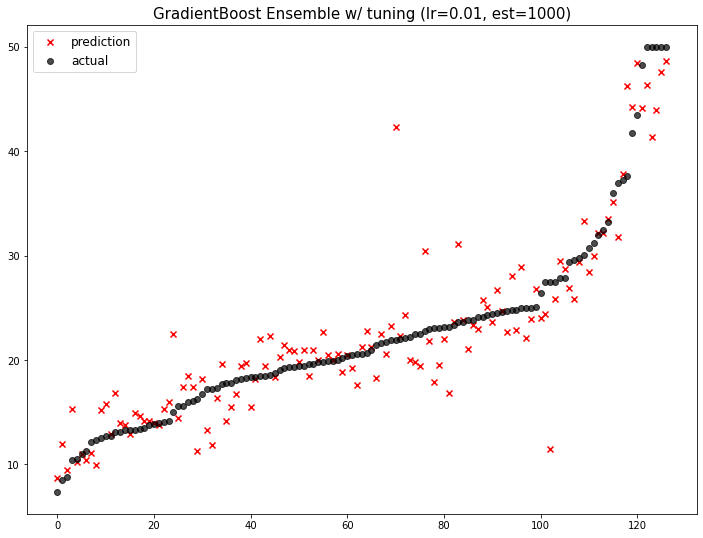

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                              GradientBoost Ensemble  13.451877
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
11                    RandomForest Ensemble w/ Tuning  11.518113


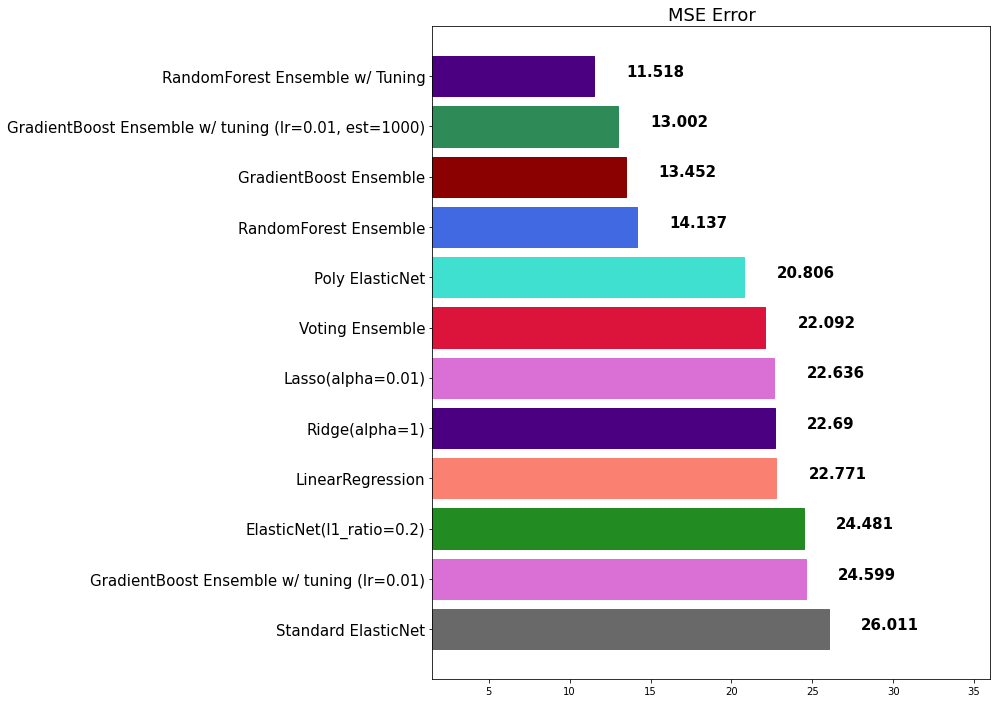

In [67]:
# tuning: learning_rate=0.01, n_estimators=1000
gbr_t2 = GradientBoostingRegressor(random_state=1, learning_rate=0.01, n_estimators=1000)
gbr_t2.fit(x_train, y_train)
gbr_t2_pred = gbr_t2.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000)', y_test, gbr_t2_pred)


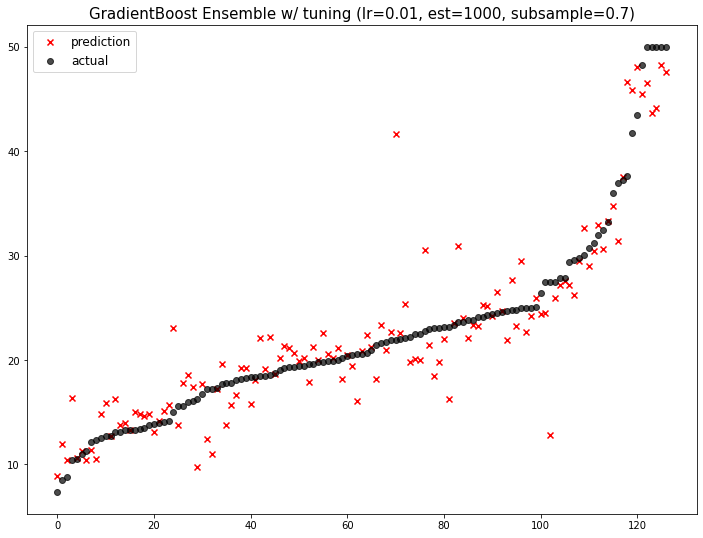

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                              GradientBoost Ensemble  13.451877
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  12.607717
12                    RandomForest Ensemble w/ Tuning  11.518113


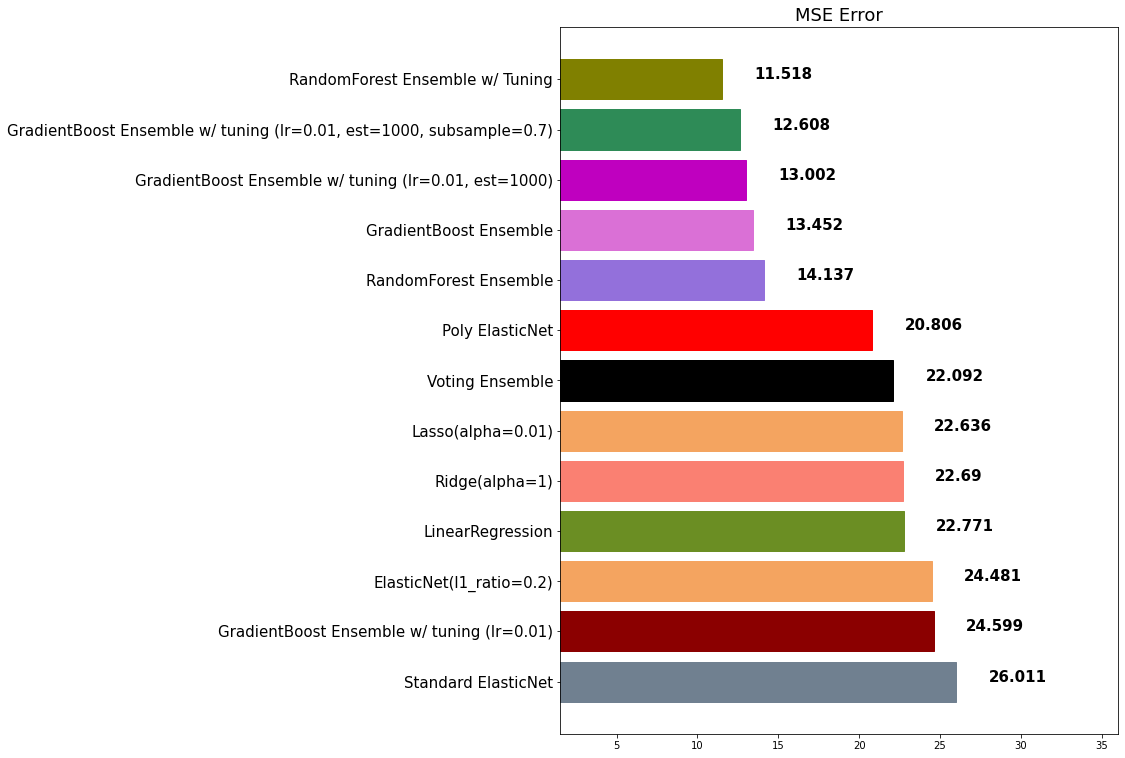

In [68]:
# tuning: learning_rate=0.01, n_estimators=1000, subsample=0.8
gbr_t3 = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.7)
gbr_t3.fit(x_train, y_train)
gbr_t3_pred = gbr_t3.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000, subsample=0.7)', y_test, gbr_t3_pred)


### 4.5.2 XGBoost

주요 특징

scikit-learn 패키지 아님

성능이 우수함

GBM보다는 빠르고 성능도 향상됨

여전히 학습 속도가 느림

In [69]:
!pip install xgboost

from xgboost import XGBRegressor, XGBClassifier

In [70]:
# default value로 학습
xgb = XGBRegressor(random_state=1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, ...)

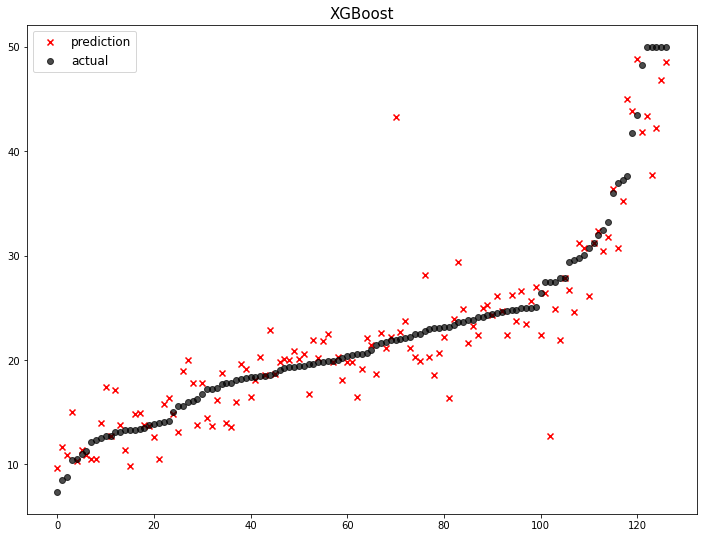

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...  12.607717
13                    RandomForest Ensemble w/ Tuning  11.518113


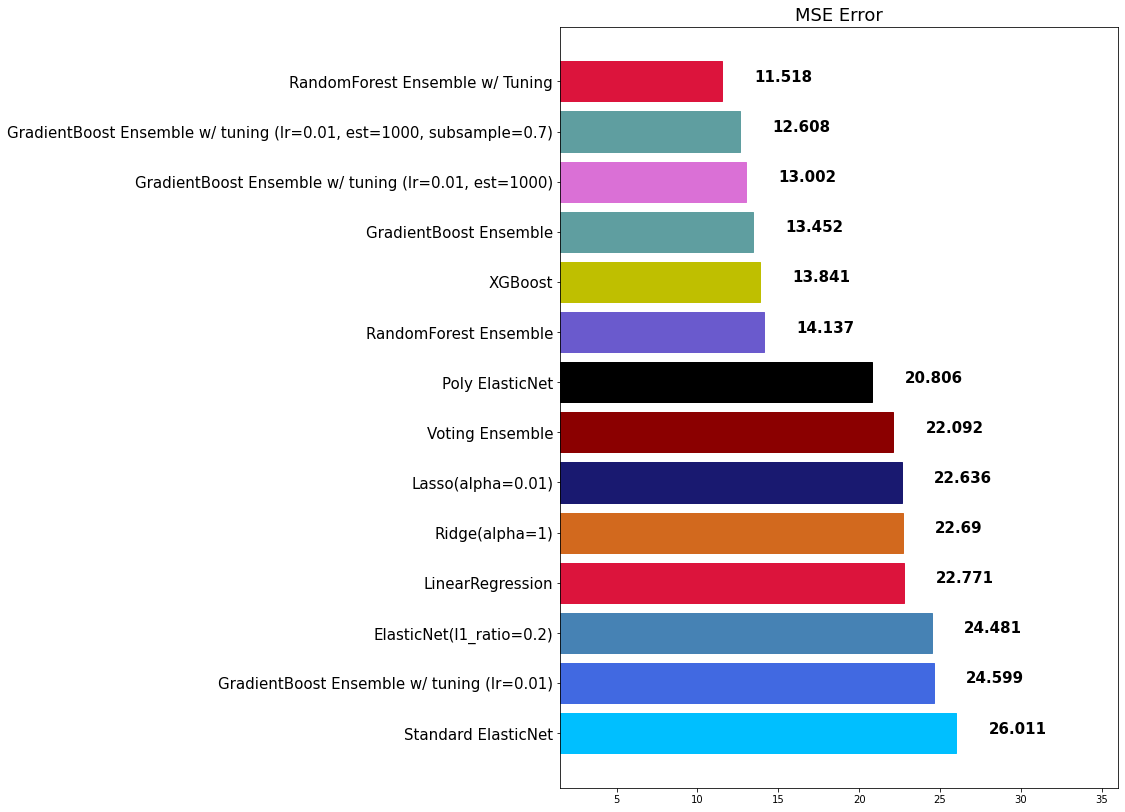

In [71]:
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', y_test, xgb_pred)

- 주요 하이퍼 파라미터

random_state:랜덤 시드 고정 값

n_jobs: CPU 사용 갯수

learning_rate:학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. 기본값=0.1

n_estimators:부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). 기본값=100

max_depth:트리의 깊이. 과대적합 방지용. 기본값=3.

subsample:샘플 사용 비율. 과대적합 방지용. 기본값=1.0

max_features:최대로 사용할 feature의 비율. 과대적합 방지용. 기본값=1.0


[23:10:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



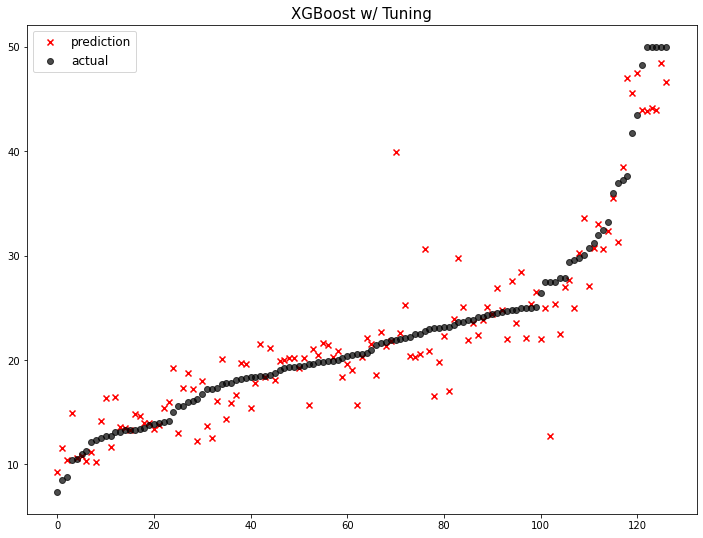

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...  12.607717
13                                  XGBoost w/ Tuning  11.987599
14                    Ran

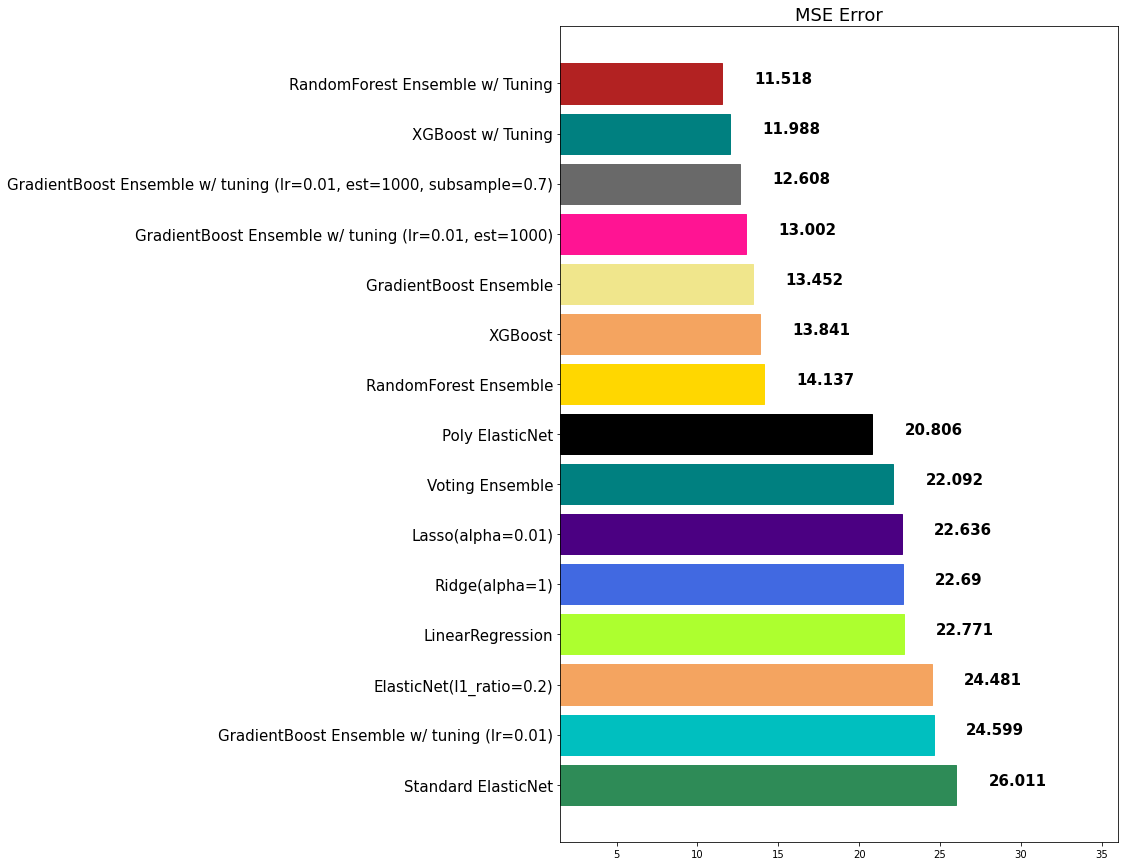

In [72]:
# with hyeper-parameter tuning
xgb_t = XGBRegressor(random_state=1, learning_rate=0.01, n_estimators=1000, subsample=0.7, max_features=0.8, max_depth=7)
xgb_t.fit(x_train, y_train)
xgb_t_pred = xgb_t.predict(x_test)
mse_eval('XGBoost w/ Tuning', y_test, xgb_t_pred)

### 4.5.3 Light GBM

주요 특징

성능이 우수함

속도도 매우 빠름

In [73]:
!pip install lightgbm

from lightgbm import LGBMRegressor, LGBMClassifier

C:\Users\82105\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\82105\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\82105\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [74]:
# default value 로 학습
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(x_train, y_train)

LGBMRegressor(random_state=1)

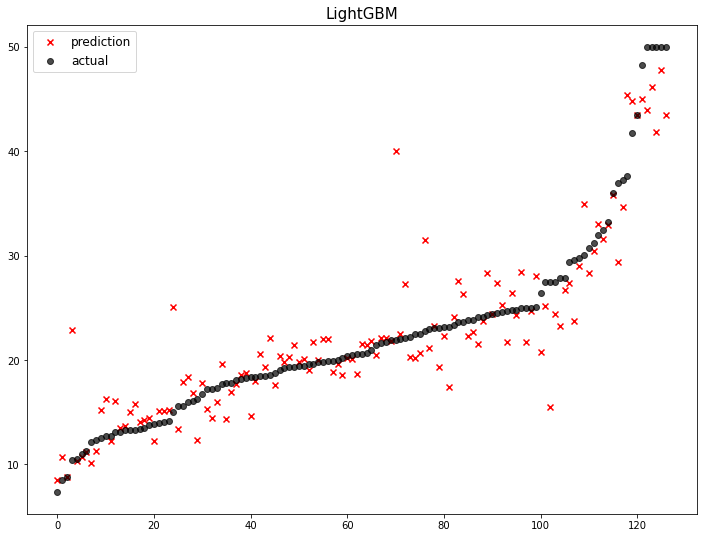

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
12                                           LightGBM  12.882170
13  GradientBoost Ensemble w/ tuning (lr=0.01, est...  12.607717
14                       

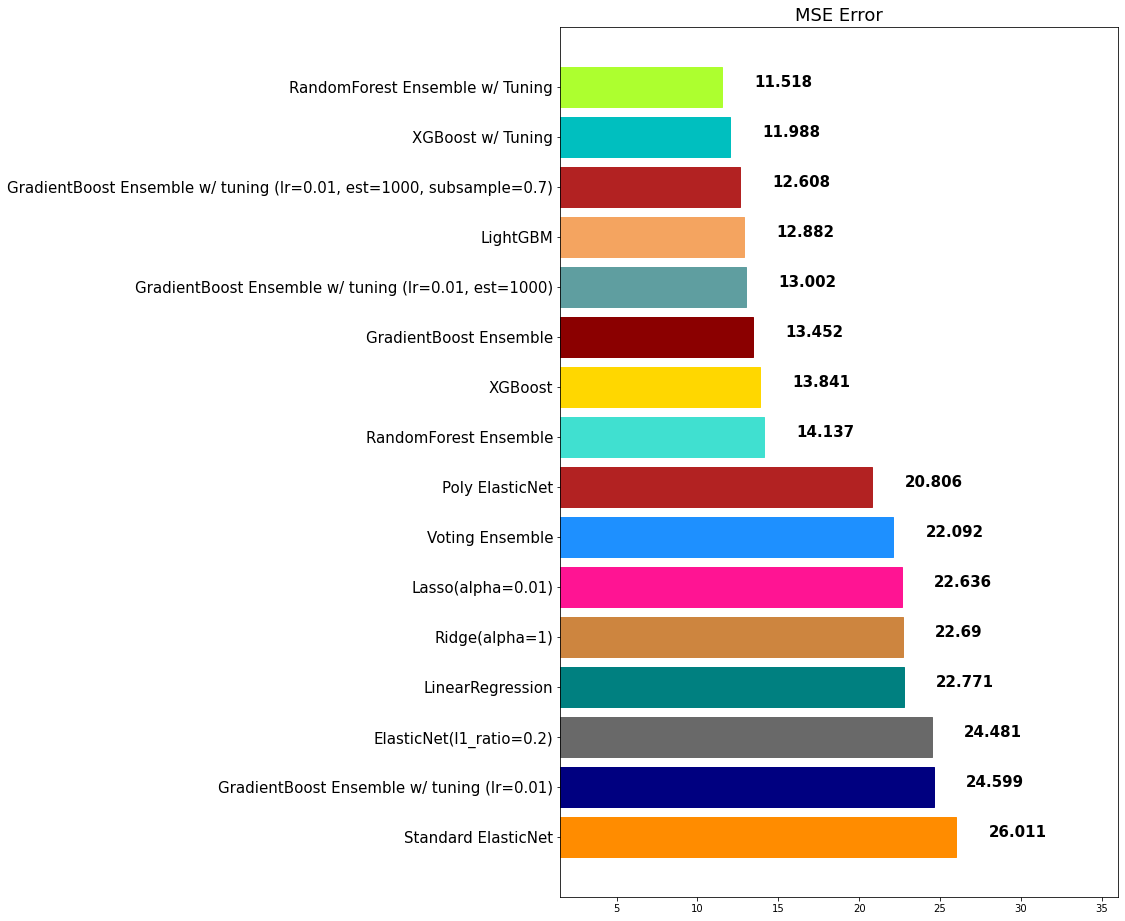

In [75]:
lgbm_pred = lgbm.predict(x_test)
mse_eval('LightGBM', y_test, lgbm_pred)

- 주요 하이퍼 파라미터

Random_state:랜덤 시드 고정 값

n_jobs: CPU 사용 갯수

learning_rate:학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. 기본값=0.1

n_estimators:부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). 기본값=100

max_depth:트리의 깊이. 과대적합 방지용. 기본값=3.

colsample_bytree:샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. 기본값=1.0

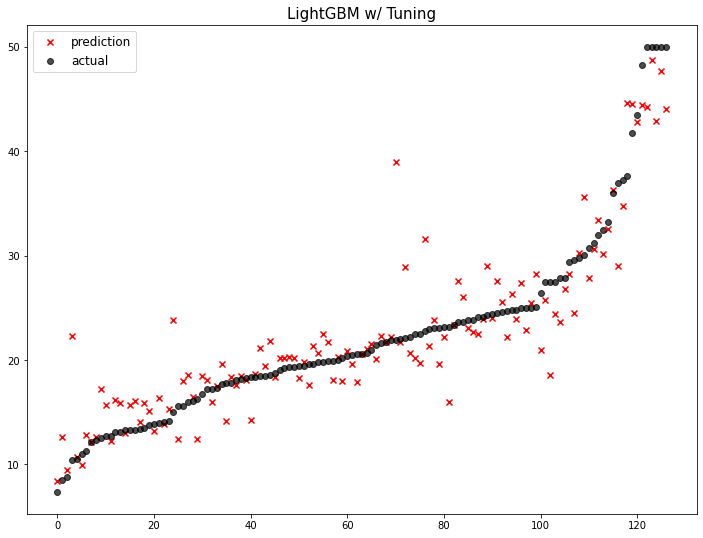

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
12                                           LightGBM  12.882170
13  GradientBoost Ensemble w/ tuning (lr=0.01, est...  12.607717
14                       

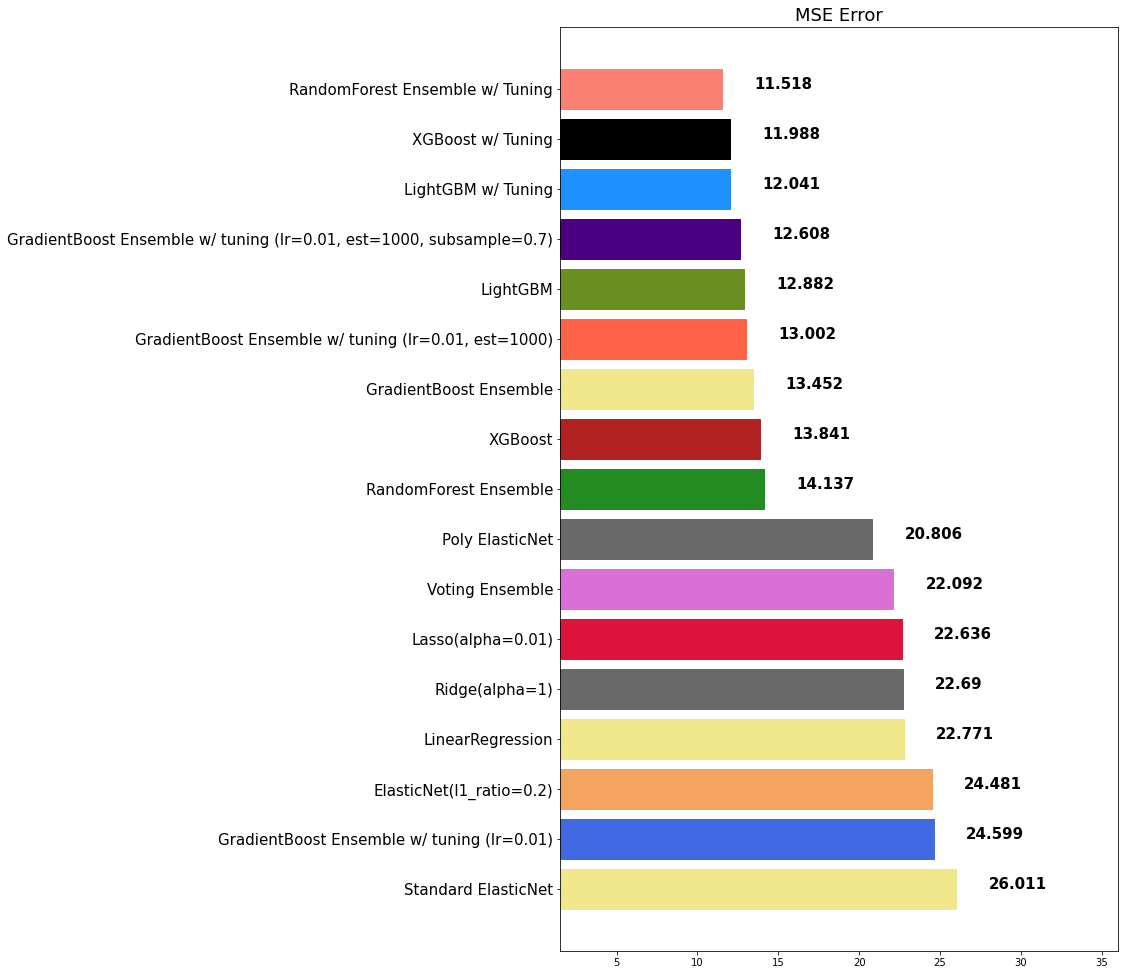

In [76]:
# with hyper-parameter tuning
lgbm_t = LGBMRegressor(random_state=1, learning_rate=0.01, n_estimators=2000, colsample_bytree=0.9, subsample=0.7, max_depth=5)
lgbm_t.fit(x_train, y_train)
lgbm_t_pred = lgbm_t.predict(x_test)
mse_eval('LightGBM w/ Tuning', y_test, lgbm_t_pred)

### 4.5.4 스태킹

개별 모델이 예측한 데이터를 기반으로final_estimators 종합하여 예측을 수행

성능을 극으로 끌어 올릴 때 활용하기도 함

과대적합을 유발할 수 있다. (특히, 데이터셋이 적은 경우)



In [77]:
from sklearn.ensemble import StackingRegressor

In [78]:
stack_models = [
    ('elasticnet', poly_elasticnet),
    ('randomforest', rfr_t),
    ('lgbm', lgbm_t)
]

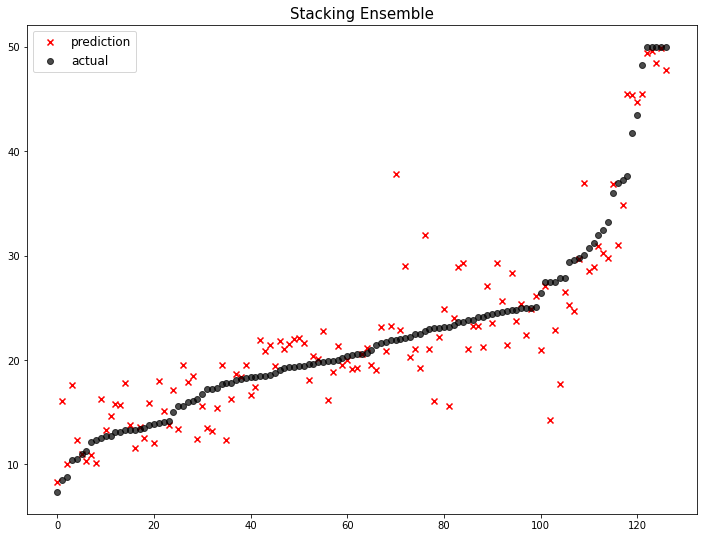

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11                                  Stacking Ensemble  13.235732
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
13                                           LightGBM  12.882170
14  GradientBoost Ensembl

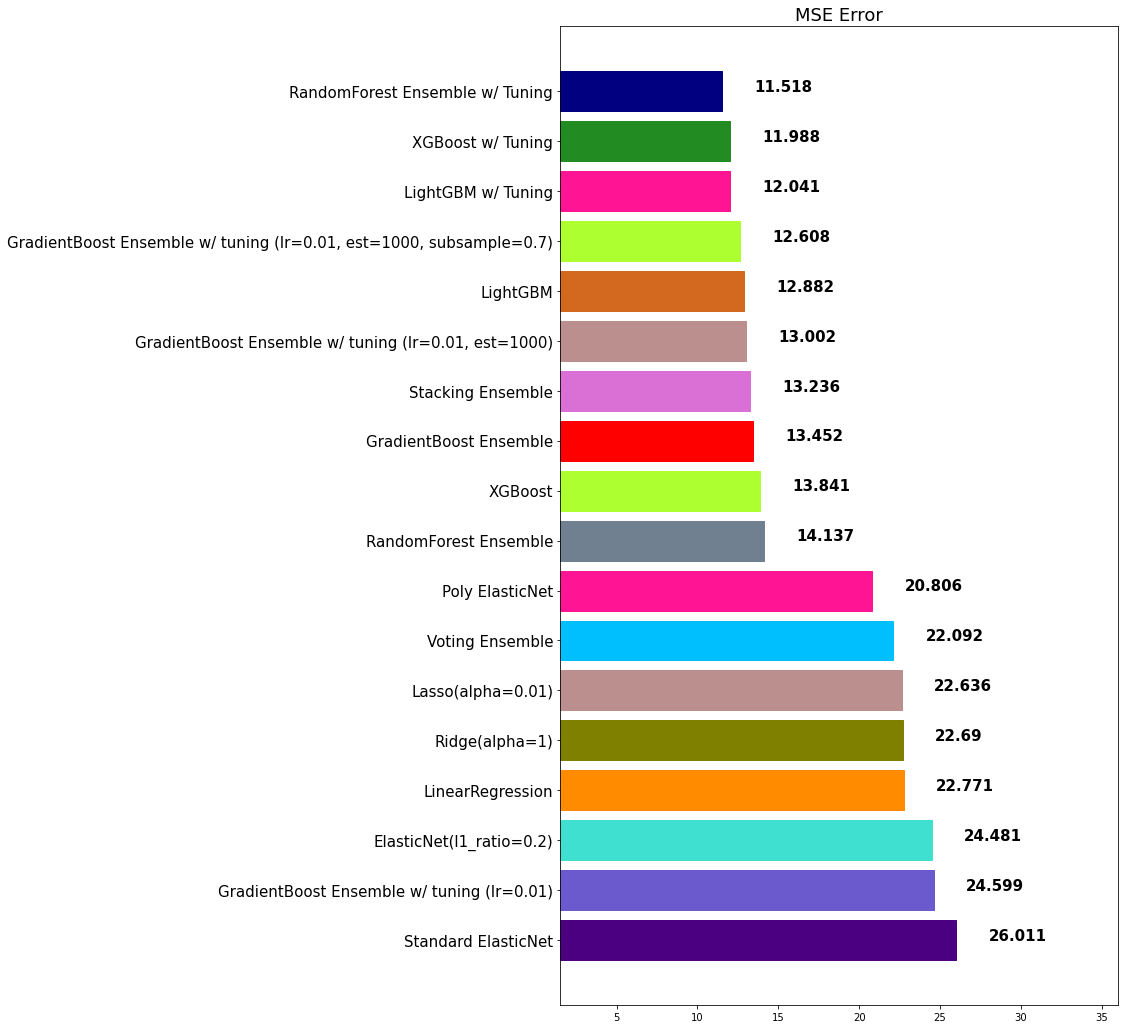

In [79]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', y_test, stack_pred)

### 4.5.5 가중 블렌딩

각 모델의예측값에 대하여 weight를 곱하여 최종 출력 산출

모델에 대한 가중치를 조절하여, 최종 출력을 산출함

가중치의 합은 1.0이 되도록 설정

In [80]:
final_outputs = {
    'randomforest': rfr_t_pred,
    'xgboost': xgb_t_pred,
    'lgbm': lgbm_t_pred
}

In [84]:
final_prediction=\
final_outputs['randomforest'] * 0.5\
+final_outputs['xgboost'] * 0.3\
+final_outputs['lgbm'] * 0.2

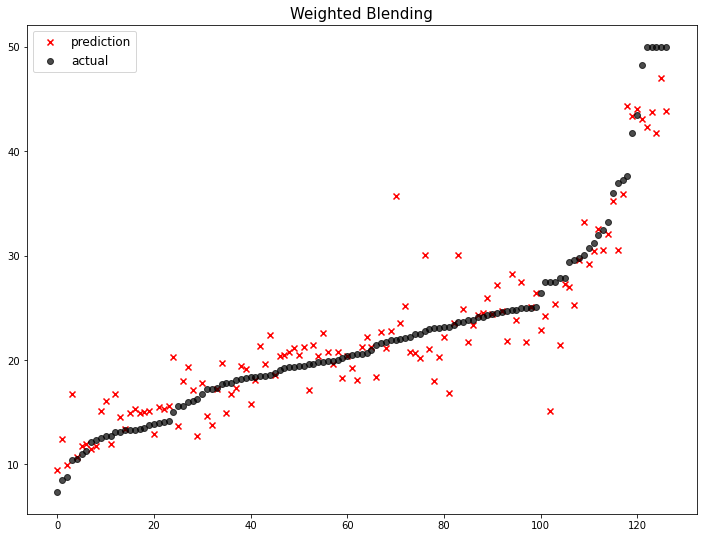

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11                                  Stacking Ensemble  13.235732
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
13                                           LightGBM  12.882170
14  GradientBoost Ensembl

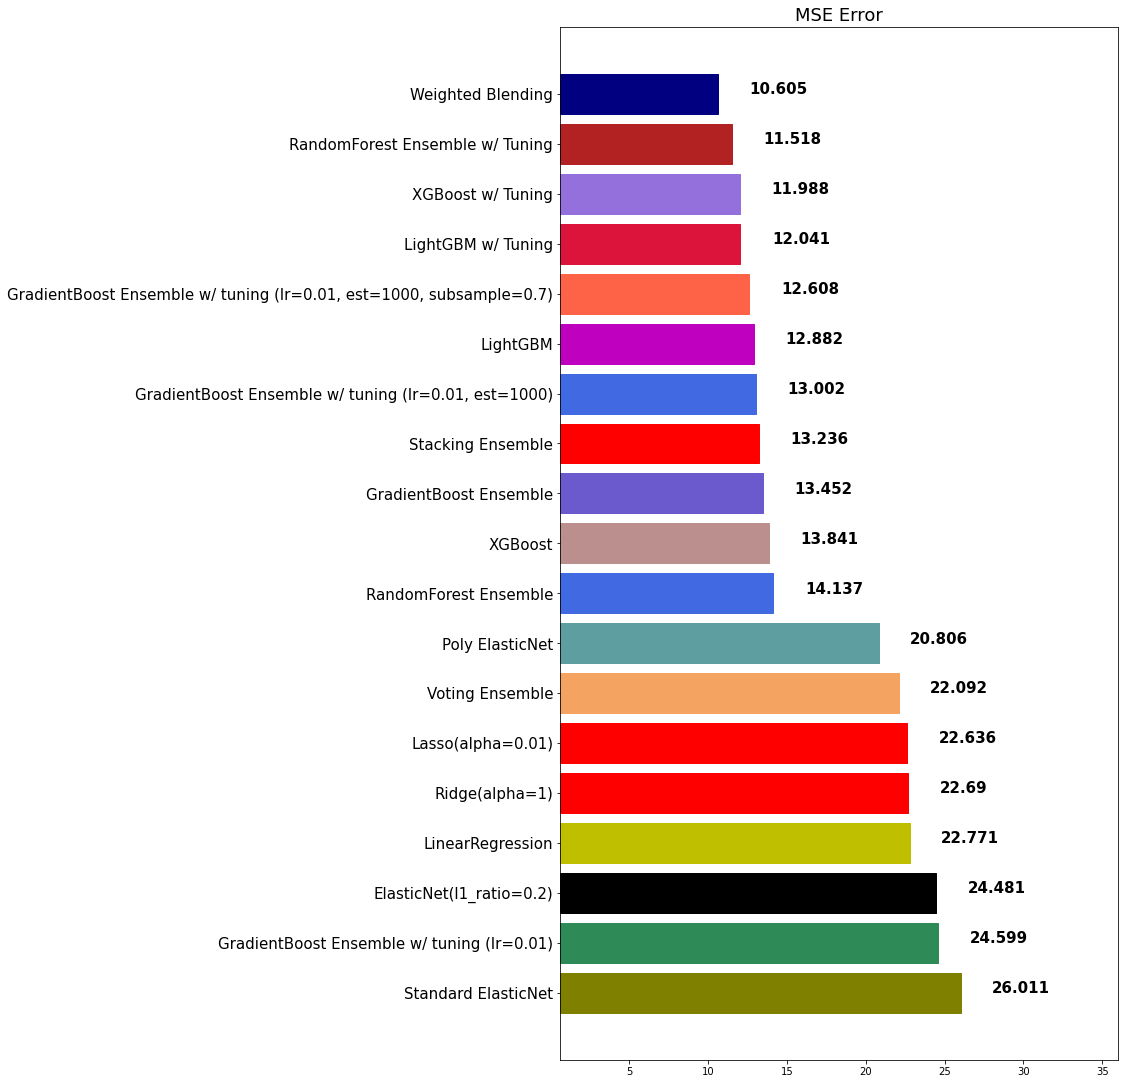

In [85]:
mse_eval('Weighted Blending', y_test, final_prediction)

# 5. 앙상블 모델 정리


- 대체적으로 단일 모델 대비 성능이 좋다

- 데이터 셋마다 차이가 존재하겠지만 해당 데이터셋에서는 
앙상블을 앙상블하는 기법인 Weighted Blending가 가장 높은 성능을 보인다.

- 하이퍼 파라미터에 따라 성능이 크게 좌우 되는 것을 보아 앙상블 모델은 적절한 Hyper-parameter Tuning이 굉장히 중요하다.

-> 해당 부분을 해결하는 하이퍼 파라미터 튜닝 방법을 뒷페이지에서 소개하겠다.

- 앙상블 모델은 여러 개의 모델을 합치는 개념이다 보니 대체적으로 학습시간이 더 오래 걸린다

- 따라서, 모델 튜닝을 하는 데에 시간이 오래 소요된다.


# 6. 하이퍼 파라미터 튜닝 

Hyper-parameter 튜닝시 경우의 수가 너무 많으므로 우리는자동화 할 필요가 있다

sklearn 패키지에서 자주 사용되는 하이퍼-파라미터 튜닝을 돕는 클래스는 다음 2가지가 있다:

무작위 서치 CV
그리드 서치 CV

## 6.1 무작위 서치 CV

모든 매개 변수 값이 시도되는 것이 아니라 지정된 분포에서 고정 된 수의 매개 변수 설정이 샘플링된다.

시도 된 매개 변수 설정의 수는 에 의해 제공됨.n_iter


- 주요 하이퍼 매개 변수

random_state:랜덤 시드 고정 값

n_jobs: CPU 사용 갯수

learning_rate:학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. 기본값=0.1

n_estimators:부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). 기본값=100

max_depth:트리의 깊이. 과대적합 방지용. 기본값=3.

colsample_bytree:샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. 기본값=1.0


In [86]:
params = {
    'learning_rate': [0.005, 0.01, 0.03, 0.05],
    'n_estimators': [500, 1000, 2000, 3000],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}



In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
rcv_lgbm = RandomizedSearchCV(LGBMRegressor(), params, random_state=1, cv=5, n_iter=100, scoring='neg_mean_squared_error')

In [89]:
rcv_lgbm.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [91]:
rcv_lgbm.best_score_

-11.201534424531408

In [92]:
rcv_lgbm.best_params_

{'subsample': 1.0,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

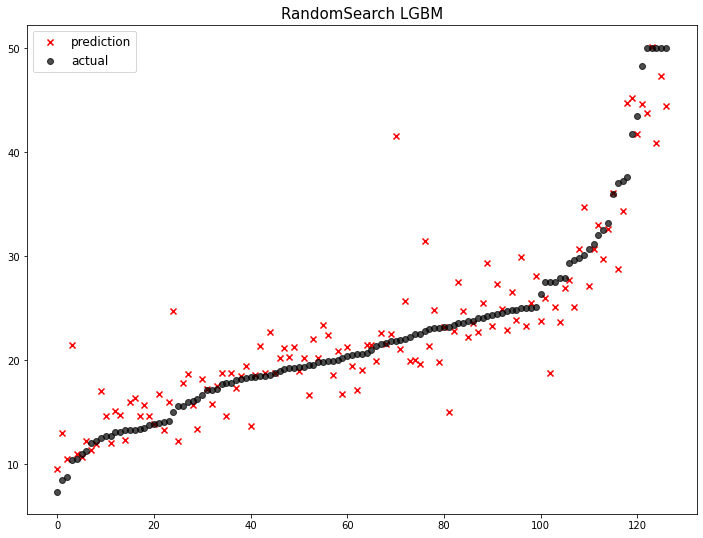

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11                                  Stacking Ensemble  13.235732
12                                  RandomSearch LGBM  13.097365
13  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
14                       

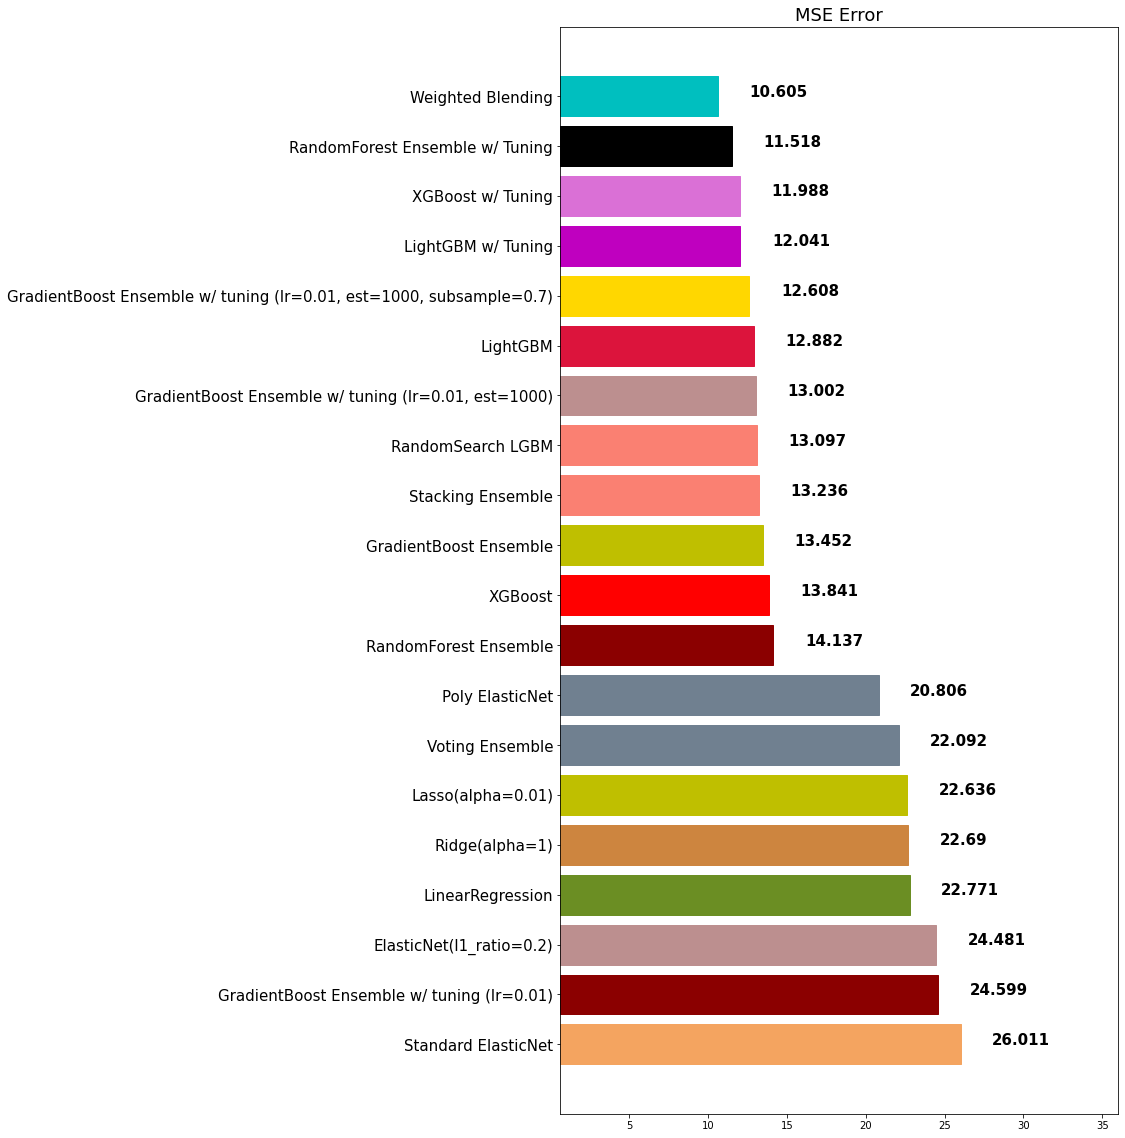

In [94]:
lgbm_best = LGBMRegressor(learning_rate=0.05, n_estimators=500, subsample=1.0, max_depth=3, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', y_test, lgbm_best_pred)

## 6.2 그리드 서치 CV

모든 매개 변수 값에 대하여 완전 탐색을 시도한다

따라서, 최적화할 parameter가 많다면, 시간이 매우 오래걸린다



In [95]:
params = {
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [800, 1000, 1200],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 0.85, 0.9],
    'subsample': [0.8, 0.85, 0.9],
}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [98]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [99]:
grid_search.best_score_

-11.068089592630589

In [101]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 800,
 'subsample': 0.8}

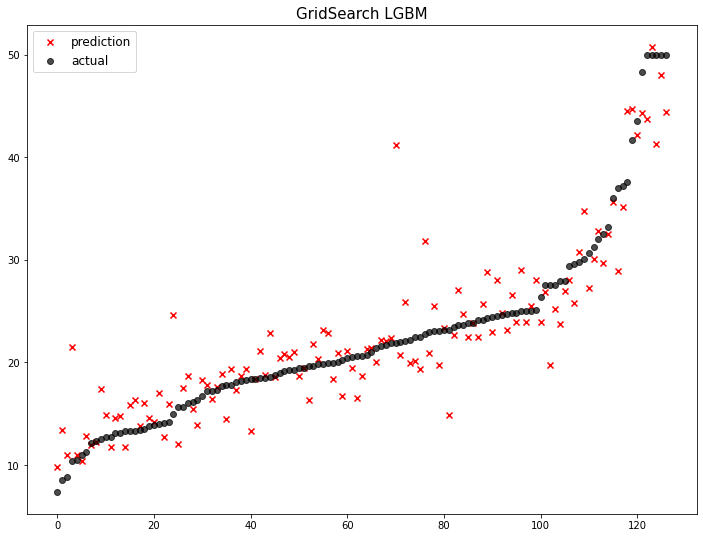

                                                model        mse
0                                 Standard ElasticNet  26.010756
1          GradientBoost Ensemble w/ tuning (lr=0.01)  24.599441
2                            ElasticNet(l1_ratio=0.2)  24.481069
3                                    LinearRegression  22.770784
4                                      Ridge(alpha=1)  22.690411
5                                   Lasso(alpha=0.01)  22.635614
6                                     Voting Ensemble  22.092158
7                                     Poly ElasticNet  20.805986
8                               RandomForest Ensemble  14.137136
9                                             XGBoost  13.841453
10                             GradientBoost Ensemble  13.451877
11                                  Stacking Ensemble  13.235732
12                                  RandomSearch LGBM  13.097365
13  GradientBoost Ensemble w/ tuning (lr=0.01, est...  13.002472
14                       

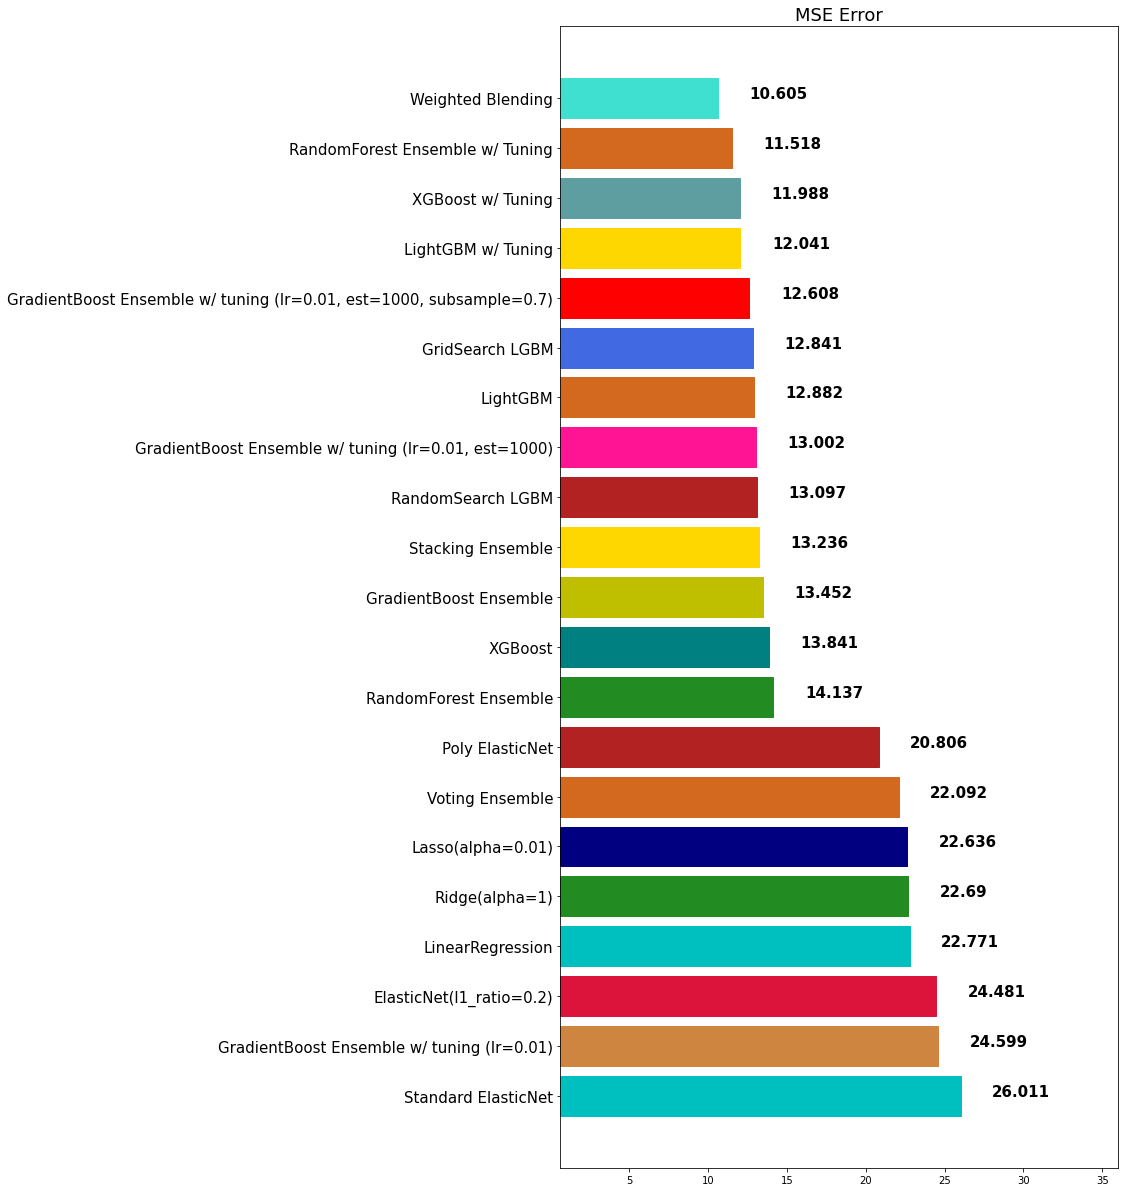

In [102]:
lgbm_best = LGBMRegressor(learning_rate=0.05, n_estimators=800, subsample=0.8, max_depth=3, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', y_test, lgbm_best_pred)

REF

# Reference

- https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2

- https://www.tibco.com/ko/reference-center/what-is-a-random-forest

- https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe

- https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost

- https://bcho.tistory.com/1354

- https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/

- https://hyemin-kim.github.io/2020/08/04/S-Python-sklearn4/

- https://tyami.github.io/machine%20learning/ensemble-1-basics/

- https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0